In [50]:
import pandas as pd
import requests
import urllib.parse as urlparse
import datetime

In [65]:
import requests
import datetime
import pandas as pd
from urllib import parse as urlparse
from dateutil.relativedelta import relativedelta

start = "-6.935271,107.717554"  # bunderan cibiru
end = "-6.917358,107.574423"  # bunderan cibeureum
key = "16mjJoC9KS9zNo9rZZJxsVYtqHeNVirt"  # API Key

# Base URL
base_url = "https://api.tomtom.com/routing/1/calculateRoute/"

today = datetime.date.today()
one_month_ago = today - relativedelta(months=1)  # Calculate date one month ago

departure_time_start = datetime.datetime(
    one_month_ago.year, one_month_ago.month, one_month_ago.day, 0, 0, 0
)

hour_range = range(0, 24)

data_frames = []  # List to hold individual DataFrames

for i in hour_range:
    # Update an hour
    departure_time = departure_time_start.replace(hour=i)

    # Format datetime string
    departure_time = departure_time.strftime('%Y-%m-%dT%H:%M:%S')

    # Create request URL
    request_params = (
            urlparse.quote(start) + ":" + urlparse.quote(end)
            + "/json?departAt=" + urlparse.quote(departure_time))

    request_url = base_url + request_params + "&key=" + key

    # Get data
    response = requests.get(request_url)

    # Convert to JSON
    json_result = response.json()

    # Get summary
    route_summary = json_result['routes'][0]['summary']

    # Convert to data frame
    df = pd.json_normalize(route_summary)

    data_frames.append(df)  # Append to the list

    print(f"Retrieving data: {i + 1} / {len(hour_range)}")

# Concatenate all DataFrames in the list
final_df = pd.concat(data_frames, ignore_index=True)

Retrieving data: 1 / 24
Retrieving data: 2 / 24
Retrieving data: 3 / 24
Retrieving data: 4 / 24
Retrieving data: 5 / 24
Retrieving data: 6 / 24
Retrieving data: 7 / 24
Retrieving data: 8 / 24
Retrieving data: 9 / 24
Retrieving data: 10 / 24
Retrieving data: 11 / 24
Retrieving data: 12 / 24
Retrieving data: 13 / 24
Retrieving data: 14 / 24
Retrieving data: 15 / 24
Retrieving data: 16 / 24
Retrieving data: 17 / 24
Retrieving data: 18 / 24
Retrieving data: 19 / 24
Retrieving data: 20 / 24
Retrieving data: 21 / 24
Retrieving data: 22 / 24
Retrieving data: 23 / 24
Retrieving data: 24 / 24


In [71]:
import requests
import datetime
import pandas as pd
from urllib import parse as urlparse
from datetime import timedelta

start = "-6.935271,107.717554"  # bunderan cibiru
end = "-6.917358,107.574423"  # bunderan cibeureum
key = "16mjJoC9KS9zNo9rZZJxsVYtqHeNVirt"  # API Key

# Base URL
base_url = "https://api.tomtom.com/routing/1/calculateRoute/"

# Calculate the date 30 days ago from today
today = datetime.date.today()
thirty_days_ago = today - timedelta(days=30)

hour_range = range(0, 24)
day_range = range(0, 30)  # 30 days

data_frames = []  # List to hold individual DataFrames

for day_offset in day_range:
    for hour in hour_range:
        # Calculate the departure time for this iteration
        departure_time = datetime.datetime(
            thirty_days_ago.year, thirty_days_ago.month, thirty_days_ago.day,
            hour, 0, 0
        )

        # Format datetime string
        departure_time_str = departure_time.strftime('%Y-%m-%dT%H:%M:%S')

        # Create request URL
        request_params = (
            urlparse.quote(start) + ":" + urlparse.quote(end)
            + "/json?departAt=" + urlparse.quote(departure_time_str))

        request_url = base_url + request_params + "&key=" + key

        # Get data
        response = requests.get(request_url)

        # Convert to JSON
        json_result = response.json()

        # Get summary
        route_summary = json_result['routes'][0]['summary']

        # Convert to data frame
        df = pd.json_normalize(route_summary)

        data_frames.append(df)  # Append to the list

        print(f"Retrieving data: Day {day_offset + 1} / {len(day_range)}, Hour {hour + 1} / {len(hour_range)}")

# Concatenate all DataFrames in the list
final_df = pd.concat(data_frames, ignore_index=True)

# Save to CSV
csv_filename = "traffic_data.csv"
final_df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")

Retrieving data: Day 1 / 30, Hour 1 / 24
Retrieving data: Day 1 / 30, Hour 2 / 24
Retrieving data: Day 1 / 30, Hour 3 / 24
Retrieving data: Day 1 / 30, Hour 4 / 24
Retrieving data: Day 1 / 30, Hour 5 / 24
Retrieving data: Day 1 / 30, Hour 6 / 24
Retrieving data: Day 1 / 30, Hour 7 / 24
Retrieving data: Day 1 / 30, Hour 8 / 24
Retrieving data: Day 1 / 30, Hour 9 / 24
Retrieving data: Day 1 / 30, Hour 10 / 24
Retrieving data: Day 1 / 30, Hour 11 / 24
Retrieving data: Day 1 / 30, Hour 12 / 24
Retrieving data: Day 1 / 30, Hour 13 / 24
Retrieving data: Day 1 / 30, Hour 14 / 24
Retrieving data: Day 1 / 30, Hour 15 / 24
Retrieving data: Day 1 / 30, Hour 16 / 24
Retrieving data: Day 1 / 30, Hour 17 / 24
Retrieving data: Day 1 / 30, Hour 18 / 24
Retrieving data: Day 1 / 30, Hour 19 / 24
Retrieving data: Day 1 / 30, Hour 20 / 24
Retrieving data: Day 1 / 30, Hour 21 / 24
Retrieving data: Day 1 / 30, Hour 22 / 24
Retrieving data: Day 1 / 30, Hour 23 / 24
Retrieving data: Day 1 / 30, Hour 24 / 24
R

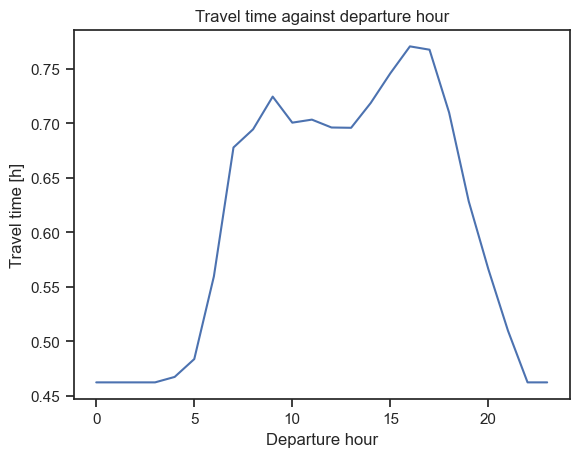

In [66]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.plot(final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time against departure hour')
plt.xlabel('Departure hour')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

In [62]:
data_frames

[   lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0           18297                 1664                      0   
 
    trafficLengthInMeters              departureTime                arrivalTime  
 0                      0  2023-07-20T00:00:00+07:00  2023-07-20T00:27:44+07:00  ,
    lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0           18297                 1664                      0   
 
    trafficLengthInMeters              departureTime                arrivalTime  
 0                      0  2023-07-20T01:00:00+07:00  2023-07-20T01:27:44+07:00  ,
    lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0           18297                 1664                      0   
 
    trafficLengthInMeters              departureTime                arrivalTime  
 0                      0  2023-07-20T02:00:00+07:00  2023-07-20T02:27:44+07:00  ,
    lengthInMeters  travelTimeInSeconds  trafficDelayInSeconds  \
 0           18297                 16

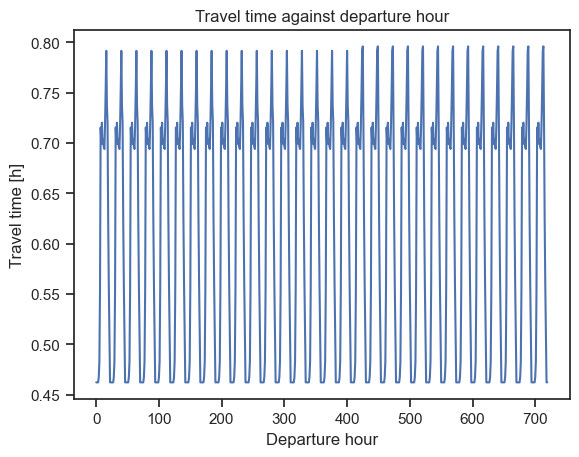

In [63]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.plot(final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time against departure hour')
plt.xlabel('Departure hour')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

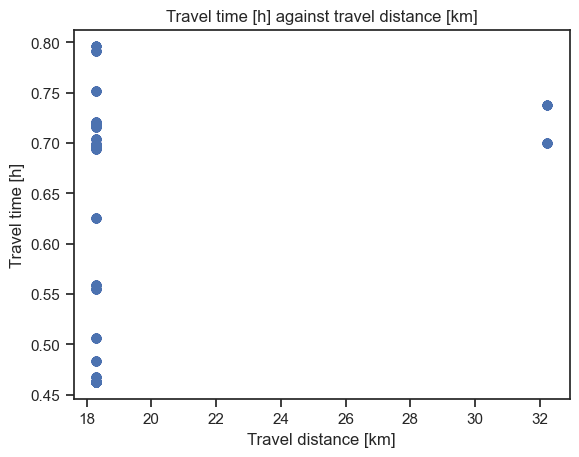

In [64]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.scatter(final_df['lengthInMeters'] / 1000, final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time [h] against travel distance [km]')
plt.xlabel('Travel distance [km]')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

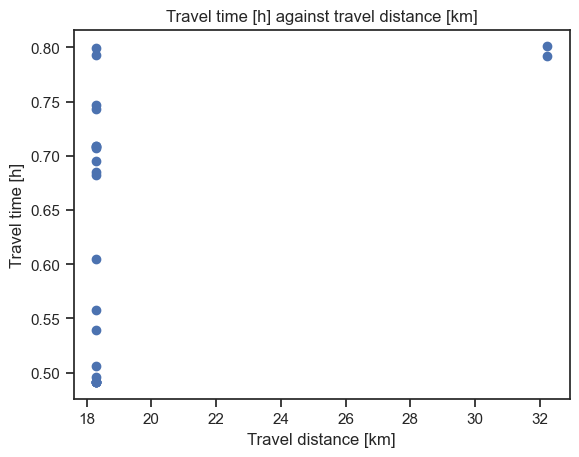

In [56]:
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame
plt.scatter(final_df['lengthInMeters'] / 1000, final_df['travelTimeInSeconds'] / 3600)
plt.title('Travel time [h] against travel distance [km]')
plt.xlabel('Travel distance [km]')
plt.ylabel('Travel time [h]')
plt.show()  # Show the plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


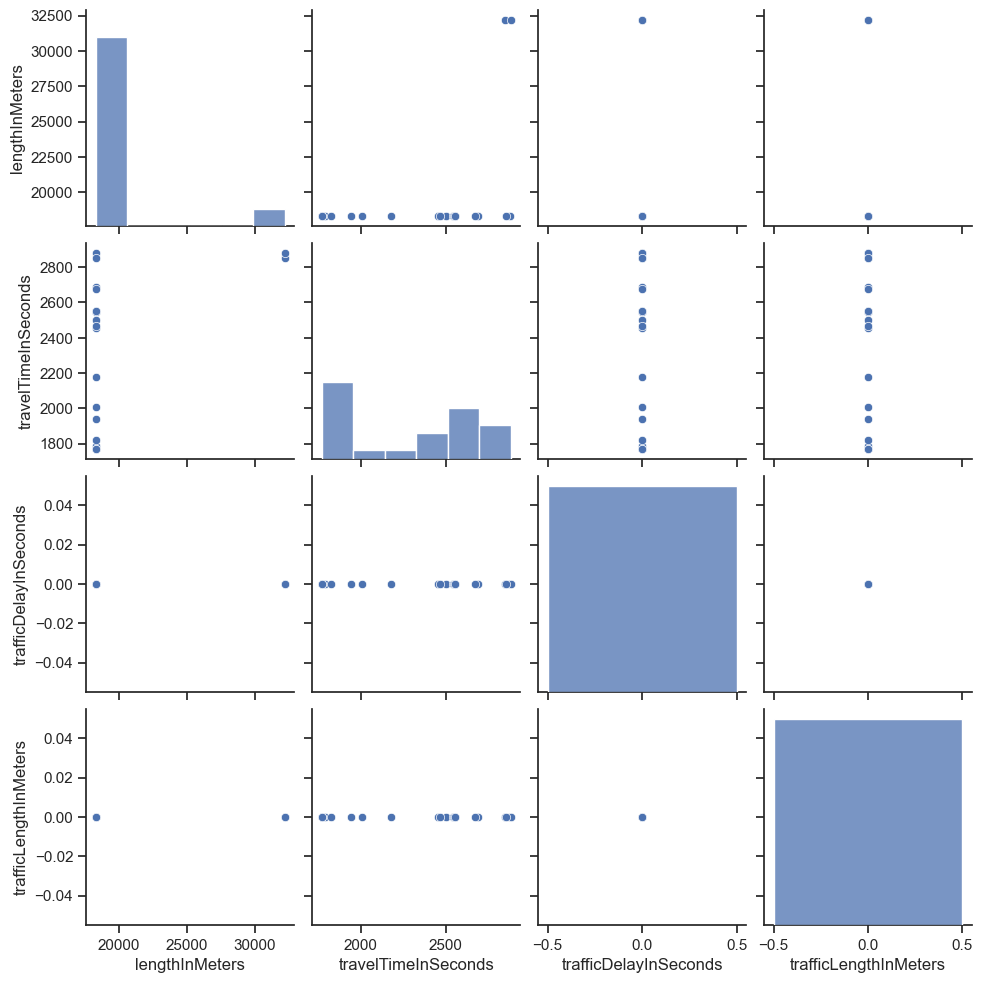

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already collected the data and created the final_df DataFrame

# Set Seaborn theme
sns.set_theme(style="ticks")

# Create a pair plot
sns.pairplot(final_df)
plt.show()  # Show the plot